<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Iniciantes/blob/main/Simulacao_da_Copa_de_Futebol_das_Olimpiadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulação da Copa de Futebol das Olimpíadas!**

## **Objetivo**

Investigar as probabilidades dos jogos de futebol na Copa das Olimpíadas de Tóquio 2021.

## **Perguntas** 

1. Qual seleção é mais provável ser campeã?
2. Quais as probabilidades das seleções avançarem para segunda fase?
3. Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?
4. A força de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?
5. Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')

6. Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?
7. Qual a probabilidade de vencer a competição por confederação?
8. Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?

9. Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os placares mais prováveis?
10. Qual a probabilidade de cada grupo apresentar um campeão?




![](https://pbs.twimg.com/media/EzfBqoFXMAAdvOR?format=jpg&name=large)

## Importação dos Dados

In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from collections import Counter

In [ ]:
from google.colab import auth
auth.authenticate_user()

from oauth2client.client import GoogleCredentials
import gspread
gc = gspread.authorize(GoogleCredentials.get_application_default())
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1dJrLGRMZvk-NU1O2AyNKFoIgTtrvosBKpof-fzBOWVE/edit#gid=0')

In [ ]:
planilha = wb.worksheet('seleções')
dados_cru = planilha.get_all_values()
dados = pd.DataFrame(dados_cru)
dados.head()

,0,1,2,3,4,5,6,7,8,9,10
0,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0


In [ ]:
dados.columns = dados.iloc[0]
dados = dados.iloc[1:]
dados

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0


In [ ]:
dados.to_csv('dados-futebol-olimpiada.csv')

## Gráficos dos Grupos



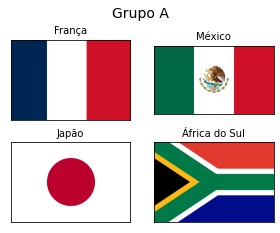

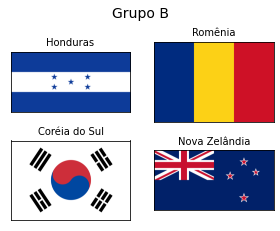

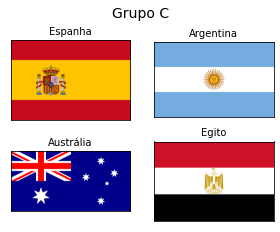

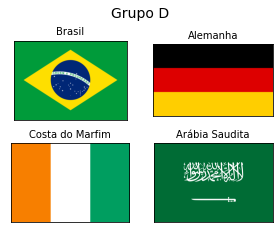

In [ ]:
def plotgrupo(grupo = 'A', salvar = False):
    d = dados.loc[dados['Grupo'] == grupo]
    fig = plt.figure(figsize = (4, 3))
    for i in range(4):
        ax = plt.subplot(2, 2, i + 1) 
        a = plt.imread(d['Bandeira'].iloc[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.title(d['País'].iloc[i], size = 10)
        plt.imshow(a)
    plt.tight_layout(w_pad = 2) 
    plt.suptitle('Grupo ' + grupo, size = 14, y = 1.05)
    if salvar:
        plt.savefig('grupo' + grupo + '.png', transparent = True)

plotgrupo('A', True)
plotgrupo('B')
plotgrupo('C')
plotgrupo('D')

## Criando a variável **Força** de cada seleção

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   País                    16 non-null     object
 1   Nome FIFA               16 non-null     object
 2   Grupo                   16 non-null     object
 3   Confederação            16 non-null     object
 4   Bandeira                16 non-null     object
 5   Cabeça-de-chave         16 non-null     object
 6   Ranking FIFA (07/04)    16 non-null     object
 7   Pontuação FIFA (07/04)  16 non-null     object
 8   Ouros                   16 non-null     object
 9   Pratas                  16 non-null     object
 10  Bronzes                 16 non-null     object
dtypes: object(11)
memory usage: 1.5+ KB


In [ ]:
for i in ['Ranking FIFA (07/04)', 'Pontuação FIFA (07/04)', 'Ouros', 'Pratas', 'Bronzes']:
    dados[i] = dados[i].astype(int)

In [ ]:
M = max(dados['Pontuação FIFA (07/04)'])
dados['Força'] = (1.2 * dados['Pontuação FIFA (07/04)']/M)**2

In [ ]:
dados

,País,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Força
1,França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.440000
2,Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.415518
3,Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.266874
4,Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.256134
5,México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.237830
6,Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.207622
7,Honduras,Honduras,B,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,67,1361,0,0,0,0.864043
8,Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.062178
9,Romênia,Romania,B,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,43,1449,0,0,0,0.979390
10,Coréia do Sul,Korea Republic,B,AFC,https://upload.wikimedia.org/wikipedia/commons...,Sim,39,1460,0,0,0,0.994317


---

## Início das funções da simulação



In [ ]:
# Função que retorna o resultado V, D ou E para as entradas dos gols de cada equipe eu uma partida simulada

def Resultado(gols1, gols2):
    if gols1 > gols2:
        res = 'V'
    if gols1 < gols2:
        res = 'D' 
    if gols1 == gols2:
        res = 'E'       
    return res

Resultado(2,2)

'E'

In [ ]:
# Retorna os pontos de cada equipe ao fim da partida (primeira fase da copa)

def Pontos(gols1, gols2):
    rst = Resultado(gols1, gols2)
    if rst == 'V':
        pontos1, pontos2 = 3, 0
    if rst == 'E':
        pontos1, pontos2 = 1, 1
    if rst == 'D':
        pontos1, pontos2 = 0, 3
    return pontos1, pontos2, rst

Pontos(1, 2)

(0, 3, 'D')

In [ ]:
# Função para apresentar os resultados de cada jogo. 
# Entre a força das duas equipes e retorna os detalhes da partida simulada pela VA Poisson

def Jogo(time1, time2):
    gols1 = int(poisson.rvs(mu = time1, size = 1))
    gols2 = int(poisson.rvs(mu = time2, size = 1)) 
    saldo1 = gols1 - gols2
    saldo2 = -saldo1
    pontos1, pontos2, result = Pontos(gols1, gols2)
    placar = '{}x{}'.format(gols1, gols2)
    return [gols1, gols2, saldo1, saldo2, pontos1, pontos2, result, placar]

Jogo(1.2, 0.8)

[1, 1, 0, 0, 1, 1, 'E', '1x1']

In [ ]:
dados.loc[dados['Grupo'] == 'A'][['País', 'Força']].reset_index(drop = True)

,País,Força
0,França,1.440000
1,México,1.237830
2,Japão,1.062178
3,África do Sul,0.818937


In [ ]:
def JogosGrupo(dados, grupo): 
    aux = dados.loc[dados['Grupo'] == grupo][['País', 'Força']].reset_index(drop = True)

    time1, time2, time3, time4 = aux['Força']
    nome1, nome2, nome3, nome4 = aux['País']

    pt1, pt2, pt3, pt4 = 0, 0, 0, 0
    gp1, gp2, gp3, gp4 = 0, 0, 0, 0
    sg1, sg2, sg3, sg4 = 0, 0, 0, 0

    jogo1 = Jogo(time1, time2)
    jogo2 = Jogo(time3, time4)

    jogo3 = Jogo(time1, time3)
    jogo4 = Jogo(time2, time4)

    jogo5 = Jogo(time1, time4)
    jogo6 = Jogo(time2, time3)

    gp1, gp2, sg1, sg2, pt1, pt2 = gp1 + jogo1[0], gp2 + jogo1[1], sg1 + jogo1[2], sg2 + jogo1[3], pt1 + jogo1[4], pt2 + jogo1[5]
    gp3, gp4, sg3, sg4, pt3, pt4 = gp3 + jogo2[0], gp4 + jogo2[1], sg3 + jogo2[2], sg4 + jogo2[3], pt3 + jogo2[4], pt4 + jogo2[5]
    gp1, gp3, sg1, sg3, pt1, pt3 = gp1 + jogo3[0], gp3 + jogo3[1], sg1 + jogo3[2], sg3 + jogo3[3], pt1 + jogo3[4], pt3 + jogo3[5]
    gp2, gp4, sg2, sg4, pt2, pt4 = gp2 + jogo4[0], gp4 + jogo4[1], sg2 + jogo4[2], sg4 + jogo4[3], pt2 + jogo4[4], pt4 + jogo4[5]
    gp1, gp4, sg1, sg4, pt1, pt4 = gp1 + jogo5[0], gp4 + jogo5[1], sg1 + jogo5[2], sg4 + jogo5[3], pt1 + jogo5[4], pt4 + jogo5[5]
    gp2, gp3, sg2, sg3, pt2, pt3 = gp2 + jogo6[0], gp3 + jogo6[1], sg2 + jogo6[2], sg3 + jogo6[3], pt2 + jogo6[4], pt3 + jogo6[5]

    partidas = [ nome1 + ' x ' + nome2, nome3 + ' x ' + nome4, nome1 + ' x ' + nome3, 
                 nome2 + ' x ' + nome4, nome1 + ' x ' + nome4, nome2 + ' x ' + nome3 ]
    resultados = [ jogo1[6], jogo2[6], jogo3[6], jogo4[6], jogo5[6], jogo6[6] ]
    placares = [ jogo1[-1], jogo2[-1], jogo3[-1], jogo4[-1], jogo5[-1], jogo6[-1] ]
    linhas = aux['País']
    cols = ['Pontos', 'Saldo de Gols', 'Gols Pró']
    tab = pd.DataFrame([[pt1, pt2, pt3, pt4], [sg1, sg2, sg3, sg4], [gp1, gp2, gp3, gp4]], index = cols, columns = linhas).transpose()
    
    tab = tab.sort_values(['Pontos', 'Saldo de Gols', 'Gols Pró'], ascending = False)
    tab['Posição'] = [1, 2, 3, 4]

    jogos = pd.DataFrame([partidas, placares, resultados]).transpose()
    jogos.columns = ['Partida', 'Placar', 'Resultado']

    return [tab, jogos]

JogosGrupo(dados, 'D')    

[                 Pontos  Saldo de Gols  Gols Pró  Posição
 País                                                     
 Brasil                9              3         5        1
 Alemanha              4              2         5        2
 Costa do Marfim       2             -1         1        3
 Arábia Saudita        1             -4         1        4,
                             Partida Placar Resultado
 0                 Brasil x Alemanha    2x1         V
 1  Costa do Marfim x Arábia Saudita    0x0         E
 2          Brasil x Costa do Marfim    1x0         V
 3         Alemanha x Arábia Saudita    3x0         V
 4           Brasil x Arábia Saudita    2x1         V
 5        Alemanha x Costa do Marfim    1x1         E]

In [ ]:
def JogoMataMata(sel1, sel2):
    time1 = dados.loc[dados['País'] == sel1]['Força']
    time2 = dados.loc[dados['País'] == sel2]['Força']
    gols1 = int(poisson.rvs(mu = time1, size = 1))
    gols2 = int(poisson.rvs(mu = time2, size = 1))  
    resultado = Resultado(gols1, gols2)
    if resultado == 'E':
        resultado = random.sample(['V', 'D'], 1)
    placar = '{}x{}'.format(gols1, gols2)
    vencedor = sel1 if resultado == 'V' else sel2
    return vencedor
 
JogoMataMata('Brasil', 'Argentina')

'Argentina'

**Quartas de final**

1: 1A vs 2B\
2: 1B vs 2A\
3: 1C vs 2D\
4: 1D vs *2C*

In [ ]:
    cols = ['1st', '2nd', '3th', '4th', 'Quartas', 'Semis', 'Final', 'Campeão']
    lins = dados['País'].to_list()
    n = len(lins)
    m = len(cols)
    aux = np.array(np.zeros(n*m).reshape(n, m))
    info = pd.DataFrame(aux, columns = cols, index = lins) 
    info = info.astype(int)
    info

,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
França,0,0,0,0,0,0,0,0
Brasil,0,0,0,0,0,0,0,0
Espanha,0,0,0,0,0,0,0,0
Argentina,0,0,0,0,0,0,0,0
México,0,0,0,0,0,0,0,0
Alemanha,0,0,0,0,0,0,0,0
Honduras,0,0,0,0,0,0,0,0
Japão,0,0,0,0,0,0,0,0
Romênia,0,0,0,0,0,0,0,0
Coréia do Sul,0,0,0,0,0,0,0,0


In [ ]:
def SimulaCopa(dados):
    cols = ['1st', '2nd', '3th', '4th', 'Quartas', 'Semis', 'Final', 'Campeão']
    lins = dados['País'].to_list()
    n = len(lins)
    m = len(cols)
    aux = np.array(np.zeros(n*m).reshape(n, m))
    info = pd.DataFrame(aux, columns = cols, index = lins) 
    info = info.astype(int)

    top8 = []
    for i in list('ABCD'):
        a = JogosGrupo(dados, i)[0] 
        top8 += a.index[:2].tolist()
        anomes = a.index.to_list() 
        info.at[anomes[0], '1st'] = 1
        info.at[anomes[1], '2nd'] = 1
        info.at[anomes[2], '3th'] = 1
        info.at[anomes[3], '4th'] = 1

    sf1 = JogoMataMata(top8[0], top8[3])
    sf2 = JogoMataMata(top8[2], top8[1])
    sf3 = JogoMataMata(top8[4], top8[7])
    sf4 = JogoMataMata(top8[6], top8[5])

    top4 = [sf1, sf2, sf3, sf4]

    f1 = JogoMataMata(sf1, sf2)
    f2 = JogoMataMata(sf3, sf4)

    top2 = [f1, f2]

    top1 = [JogoMataMata(f1, f2)]

    info.at[top8, 'Quartas'] = 1
    info.at[top4, 'Semis'] = 1
    info.at[top2, 'Final'] = 1
    info.at[top1, 'Campeão'] = 1
    return info

SimulaCopa(dados)

,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
França,0,1,0,0,1,1,1,0
Brasil,0,0,0,1,0,0,0,0
Espanha,0,0,1,0,0,0,0,0
Argentina,1,0,0,0,1,1,0,0
México,0,0,0,1,0,0,0,0
Alemanha,1,0,0,0,1,0,0,0
Honduras,1,0,0,0,1,0,0,0
Japão,1,0,0,0,1,0,0,0
Romênia,0,0,1,0,0,0,0,0
Coréia do Sul,0,1,0,0,1,1,0,0


In [ ]:
def SimulacaoTotal(dados, S = 1000): 
    print('Iniciando simulação...')
    info = SimulaCopa(dados)
    for i in range(S-1):
        info += SimulaCopa(dados)
        if (i+2)%(S/10) == 0:
            print('Simulando Copa: {:.0f}% pronto'.format(100*((i+2)/S)))
    return info.sort_values(by = 'Campeão', ascending = False)/S

sim = SimulacaoTotal(dados, 10000)
sim

Iniciando simulação...
Simulando Copa: 10% pronto
Simulando Copa: 20% pronto
Simulando Copa: 30% pronto
Simulando Copa: 40% pronto
Simulando Copa: 50% pronto
Simulando Copa: 60% pronto
Simulando Copa: 70% pronto
Simulando Copa: 80% pronto
Simulando Copa: 90% pronto
Simulando Copa: 100% pronto


,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
Brasil,0.4105,0.2716,0.1908,0.1271,0.6821,0.3705,0.2044,0.1459
Argentina,0.3135,0.2686,0.2295,0.1884,0.5821,0.3026,0.1639,0.1112
Espanha,0.3237,0.2713,0.2183,0.1867,0.5950,0.3003,0.1641,0.1088
França,0.3959,0.2727,0.1965,0.1349,0.6686,0.4085,0.2450,0.1053
Alemanha,0.2934,0.2828,0.2367,0.1871,0.5762,0.2975,0.1405,0.0950
México,0.2819,0.2787,0.2462,0.1932,0.5606,0.3343,0.1930,0.0712
Austrália,0.1947,0.2390,0.2614,0.3049,0.4337,0.2062,0.1098,0.0677
Egito,0.1681,0.2211,0.2908,0.3200,0.3892,0.1805,0.0993,0.0585
Japão,0.2079,0.2522,0.2773,0.2626,0.4601,0.2617,0.1422,0.0450
Costa do Marfim,0.1538,0.2288,0.2832,0.3342,0.3826,0.1784,0.0625,0.0365


In [ ]:
#adicionando os resultados da simulacao ao conjunto de dados
dados_sim = dados.set_index('País')
dados_sim = pd.concat([dados_sim, sim], axis = 1).sort_values(by = 'Campeão', ascending = False)


In [ ]:
dados_sim

,Nome FIFA,Grupo,Confederação,Bandeira,Cabeça-de-chave,Ranking FIFA (07/04),Pontuação FIFA (07/04),Ouros,Pratas,Bronzes,Força,1st,2nd,3th,4th,Quartas,Semis,Final,Campeão
Brasil,Brazil,D,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Sim,3,1742,1,3,2,1.415518,0.4105,0.2716,0.1908,0.1271,0.6821,0.3705,0.2044,0.1459
Argentina,Argentina,C,CONMEBOL,https://upload.wikimedia.org/wikipedia/commons...,Não,8,1641,2,2,0,1.256134,0.3135,0.2686,0.2295,0.1884,0.5821,0.3026,0.1639,0.1112
Espanha,Spain,C,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,6,1648,1,2,0,1.266874,0.3237,0.2713,0.2183,0.1867,0.5950,0.3003,0.1641,0.1088
França,France,A,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Sim,2,1757,1,1,0,1.440000,0.3959,0.2727,0.1965,0.1349,0.6686,0.4085,0.2450,0.1053
Alemanha,Germany,D,UEFA,https://upload.wikimedia.org/wikipedia/commons...,Não,12,1609,1,1,1,1.207622,0.2934,0.2828,0.2367,0.1871,0.5762,0.2975,0.1405,0.0950
México,Mexico,A,CONCACAF,https://upload.wikimedia.org/wikipedia/commons...,Não,11,1629,1,0,0,1.237830,0.2819,0.2787,0.2462,0.1932,0.5606,0.3343,0.1930,0.0712
Austrália,Australia,C,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,41,1457,0,0,0,0.990235,0.1947,0.2390,0.2614,0.3049,0.4337,0.2062,0.1098,0.0677
Egito,Egypt,C,CAF,https://upload.wikimedia.org/wikipedia/commons...,Não,46,1432,0,0,0,0.956544,0.1681,0.2211,0.2908,0.3200,0.3892,0.1805,0.0993,0.0585
Japão,Japan,A,AFC,https://upload.wikimedia.org/wikipedia/commons...,Não,28,1509,0,0,0,1.062178,0.2079,0.2522,0.2773,0.2626,0.4601,0.2617,0.1422,0.0450
Costa do Marfim,Côte d'Ivoire,D,CAF,https://upload.wikimedia.org/wikipedia/commons...,Não,59,1384,0,0,0,0.893493,0.1538,0.2288,0.2832,0.3342,0.3826,0.1784,0.0625,0.0365


In [ ]:
def SimulaJogo(eq1, eq2, dados = dados, S = 1000):
    forca1 = dados.loc[dados['País'] == eq1]['Força']
    forca2 = dados.loc[dados['País'] == eq2]['Força']
      
    resultados = [] 
    placares = []
    for i in range(S):
        jogo = Jogo(forca1, forca2)
        resultados.append(jogo[-2])
        placares.append(jogo[-1])

    probs = (pd.Series(Counter(resultados))/S).sort_index(ascending = False).to_frame()
    probs.columns = ['Probabilidade']

    placs = (pd.Series(Counter(placares))/S).sort_values(ascending = False).to_frame()
    placs.columns = ['Probabilidade']

    a = list(range(0,8))
    poss_plac = ['{}x{}'.format(x,y) for x in a for y in a]

    import numpy as np
    aux1 = pd.Series(np.zeros(len(poss_plac)), index = poss_plac).to_frame()

    prob_placares = pd.concat([aux1, placs], axis = 1).fillna(0).drop(0, axis = 1)
    prob_placares

    return [probs, prob_placares]

jogo = SimulaJogo('Brasil', 'Alemanha')
jogo

[   Probabilidade
 V          0.415
 E          0.239
 D          0.346,      Probabilidade
 0x0          0.067
 0x1          0.111
 0x2          0.059
 0x3          0.027
 0x4          0.005
 ..             ...
 7x3          0.000
 7x4          0.000
 7x5          0.000
 7x6          0.000
 7x7          0.000
 
 [64 rows x 1 columns]]

---

In [ ]:
# Questão 1: Qual seleção é mais provável ser campeã?
resposta = dados_sim.index[0]
print('Resposta 1:', resposta)

Resposta 1: Brasil


In [ ]:
# Questão 2: Quais as probabilidades das seleções avançarem para segunda fase?
resposta = dados_sim[['Quartas']]
print('Resposta 2:')
resposta

Resposta 2:


,Quartas
Brasil,0.6821
Argentina,0.5821
Espanha,0.5950
França,0.6686
Alemanha,0.5762
México,0.5606
Austrália,0.4337
Egito,0.3892
Japão,0.4601
Costa do Marfim,0.3826


In [ ]:
# Questão 3: Quais as probabilidades das seleções ficarem em 1º, 2º, 3º e 4º em seus grupos na primeira fase?
resposta = dados_sim[['1st', '2nd', '3th', '4th']]
print('Resposta 3:')
resposta

Resposta 3:


,1st,2nd,3th,4th
Brasil,0.4105,0.2716,0.1908,0.1271
Argentina,0.3135,0.2686,0.2295,0.1884
Espanha,0.3237,0.2713,0.2183,0.1867
França,0.3959,0.2727,0.1965,0.1349
Alemanha,0.2934,0.2828,0.2367,0.1871
México,0.2819,0.2787,0.2462,0.1932
Austrália,0.1947,0.2390,0.2614,0.3049
Egito,0.1681,0.2211,0.2908,0.3200
Japão,0.2079,0.2522,0.2773,0.2626
Costa do Marfim,0.1538,0.2288,0.2832,0.3342


Resposta 4:


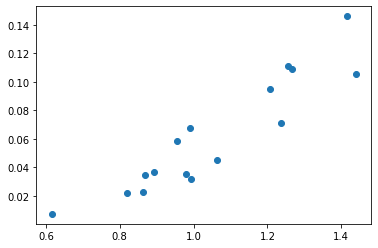

In [ ]:
# Questão 4: A força de uma equipe é proporcional a sua probabilidade de vencer a competição? Se não, porquê?
print('Resposta 4:') 
plt.scatter(dados_sim['Força'], dados_sim['Campeão']);

In [ ]:
# Questão 5: Qual a probabilidade de todos cabeça de chave passarem simultâneamente para a segunda fase? (Probabilidade da 'zebra')
print('Resposta 5:')  
dados_sim[dados_sim['Cabeça-de-chave'] == 'Sim']['Quartas'].prod()

Resposta 5:


0.15697653944245

In [ ]:
# Questão 6: Qual a probabilidade de pelo menos uma das quatro seleções mais fracas ganhar a competição?
print('Resposta 6:')  
dados_sim.sort_values(by = 'Ranking FIFA (07/04)', ascending = False).iloc[:4, :]['Campeão'].sum()

Resposta 6:


0.0874

Resposta 7:


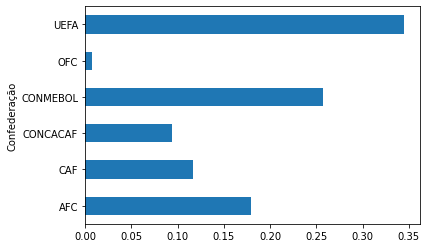

In [ ]:
# Questão 7: Qual a probabilidade de vencer a competição por confederação?
print('Resposta 7:')  
dados_sim['Campeão'].groupby(dados_sim['Confederação']).sum().plot(kind = 'barh');

In [ ]:
# Questão 8: Qual a probabilidade de uma seleção sem medalhas em sua história vencer a competição?
print('Resposta 8:')  
dados_sim[dados_sim['Ouros'] + dados_sim['Pratas'] + dados_sim['Bronzes'] == 0]['Campeão'].sum()

Resposta 8:


0.36260000000000003

In [ ]:
# Questão 9: Se o Brasil jogar com a Alemanha, qual a probabilidade de acontecer um 7x1 para a Alemanha? E um 7x1 para o Brasil? Quais os placares mais prováveis?
 
jogo = SimulaJogo('Brasil', 'Alemanha', S = 100000)

In [ ]:
print('Resposta 9:') 
print(jogo[1].loc['7x1',:])
print(jogo[1].loc['1x7',:])

Resposta 9:
Probabilidade    0.00019
Name: 7x1, dtype: float64
Probabilidade    0.00012
Name: 1x7, dtype: float64


In [ ]:
#Os 10 placares mais prováveis
jogo[1].sort_values(by = 'Probabilidade', ascending = False).head(10)

,Probabilidade
1x1,0.12454
1x0,0.10312
2x1,0.08913
0x1,0.08758
1x2,0.07333
2x0,0.07317
0x0,0.07293
2x2,0.05343
0x2,0.05266
3x1,0.04170


In [ ]:
#As probabilidades da partida
jogo[0]

,Probabilidade
V,0.42095
E,0.26175
D,0.31730


Resposta 10:


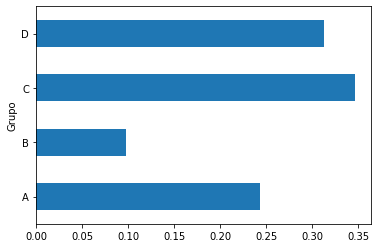

In [ ]:
# Questão 10: Qual a probabilidade de cada grupo apresentar um campeão?
print('Resposta 10:')  
dados_sim['Campeão'].groupby(dados_sim['Grupo']).sum().plot(kind = 'barh');

---

## **Planos de continuação!**
2. Propor um modelo para a força dos times (regressão Poisson, por exemplo).
3. Fazer webscrapping de fontes de dados para utilizar na modelagem da força do time.
4. Montar um Dashboard dos resultados da simulação.
5. Fazer gráficos automaticos com formato para redes sociais.
